## 1. Introduction
Student Name: Yexuan Gao
### 1.1. The Problem
Based on the demographic data, what group of people are more likely to survive in the disaster of the Titanic.

### 1.2. Population
The population of this problem is all the people onboard including crew and passengers on the Titanic.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
%cd '/content/drive/MyDrive/tcss551/project/'

/content/drive/MyDrive/tcss551/project


## 2. Data

### 2.1 Raw Data Description

The data contains information of each passenger on the titanic. Each row represents a passenger with related information of whether the passenger survived, a number for social class,

In [31]:

import os
titanic_data_file = 'titanic-data/train.csv'

print("Titanic Data ------------------")
with open(titanic_data_file, 'r') as f:
  for i in range(15):
    print(f.readline())

Titanic Data ------------------
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S

2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C

3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S

4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S

5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S

6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q

7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S

8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S

9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S

10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C

11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S

12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S

13,0,3,"S

## 2.2 Data Wrangling
### 2.2.a Strucutre

From the result of the previous code block, the data here is rectangularly shaped containing (string, int, float) value. Variable values that can be one of string, int, and float are seperated with comma. Each row represent a record of a person on the titanic.

In [32]:
titanic_df = pd.read_csv(titanic_data_file)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2.b Granularity
Based on the results of the code block above, we see that each row,  identified by 'PassengerId' represents one entry of a passenger information. The data were collected at the individual level.

Passengers' first and last names are recorded together with their courtesy titles. This data also contain if there are someone's siblings, spouses, parents, or children onboard for each passenger.


Passengers' socio-economic class attributes, however, are generally represented as proxies in the data where 1 is upper class, 2 is middle class, 3 is lower class.



In [33]:
titanic_df['Pclass'].unique() # passengers social class representations

array([3, 1, 2])

### 2.2.c Scope & Temporality
This data was collected for  one specific disaster, the Sink of Titanic. The data only represents the time of the disaster happened, which is April 15, 1912.

The data only captures a subset of the people on the titanic.

In [34]:
print(f"""Number of records in the table: {len(titanic_df)}""")

Number of records in the table: 891


### 2.2.d Faithfulness
This is property cannot be determined since there is not information on how the data were collected. It's not possible to verify that current data is accurate.

Number of data entries has been verified as cliamed in the original Kaggle post, where the current data is a subset of the actual passengers of the Titanic, 891 / 2224.

We can also verify that
- the age data are between (0,100).
- 'Survived' status should only be 0 and 1
- 'Fare' must be at least 0

In [35]:
print(titanic_df['Age'].min(), titanic_df['Age'].max()) # Age min and max
print(titanic_df['Survived'].unique()) # survived column values should be only 0 or 1
print(titanic_df['Fare'].min(), titanic_df['Fare'].max()) # Ticket fare should be at least 0

0.42 80.0
[0 1]
0.0 512.3292


However, from the preview of the data table we can see there is $NaN$ value. Here, we summerize the precentage of empty value for each column, which is beneficial for future data preprocessing.





In [36]:
print("Percentage of empty entries for each column")
for col in titanic_df.columns:
  print(f"{col}: {np.round(titanic_df[col].isna().sum() / len(titanic_df) * 100, decimals=2)}")

Percentage of empty entries for each column
PassengerId: 0.0
Survived: 0.0
Pclass: 0.0
Name: 0.0
Sex: 0.0
Age: 19.87
SibSp: 0.0
Parch: 0.0
Ticket: 0.0
Fare: 0.0
Cabin: 77.1
Embarked: 0.22


From the result above, it is obvious that 'Cabin' columns contains a lot of empty entries. About 20% of the 'Age' data is also missing. This result will affect how data processing should be done.

## 2.3 Representation of data

From the following visualizaiton of number of males and females in the current data. The number of male passengers is nearly twice as much as female passengers. We need to assume that the ratio of male and female in the population is also close to the 2:1.

As we expect on the Titanic, most passenger fares should be low with several high fares. The histogram of the ticket fare shows a reasonable distribution where most poeple have low fares.
The majority of the people onboard should be in lower socio-economic class. The bar plot of socio-economic class value also represents the demographic on the Titanic well.

Hence, it's reasonable to conclude the current data is representative of the population.

Additionally, we also need to assume that the survival ratio of the population is similar to the one obtained from the data. The assumption that the demographic of the population(crew and passenger) was similar to the demographic described in the dataset is also required to use the current data to solve the problem.





<Axes: title={'center': 'Number of Male and Female Passengers'}, xlabel='Sex'>

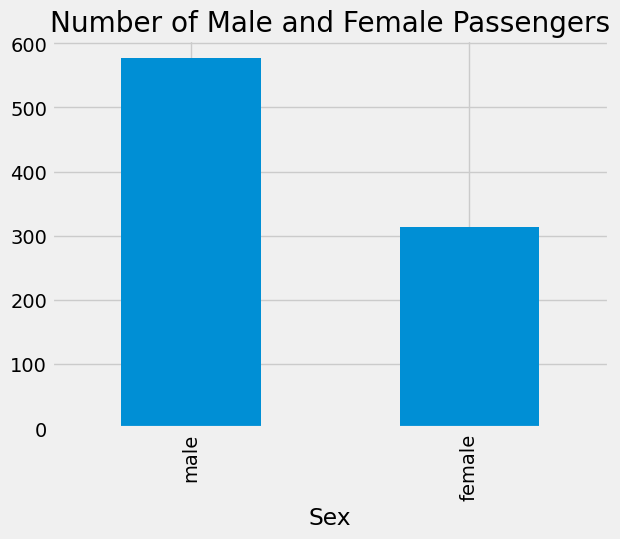

In [37]:
#  the number of male and female passengers based on the training data in a bar plot
titanic_df['Sex'].value_counts().plot(kind='bar', title='Number of Male and Female Passengers')

<Axes: title={'center': 'Distribution of Ticket Fare'}, ylabel='Frequency'>

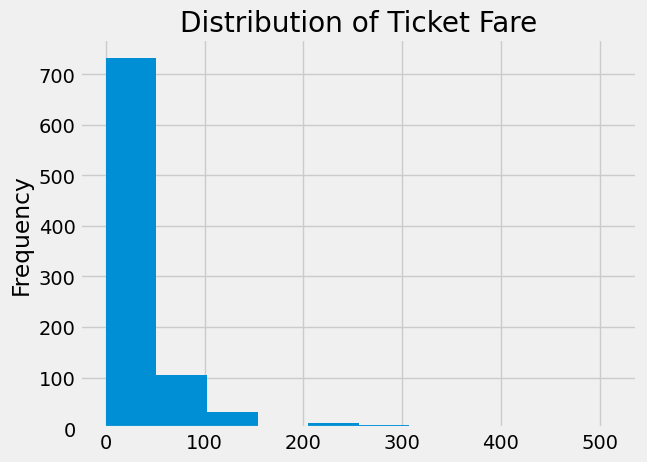

In [38]:
# the distribution of the ticket fare in the dataset
titanic_df['Fare'].plot(kind='hist', title='Distribution of Ticket Fare')

<Axes: title={'center': 'Distribution of Socio-economic class'}, xlabel='Pclass'>

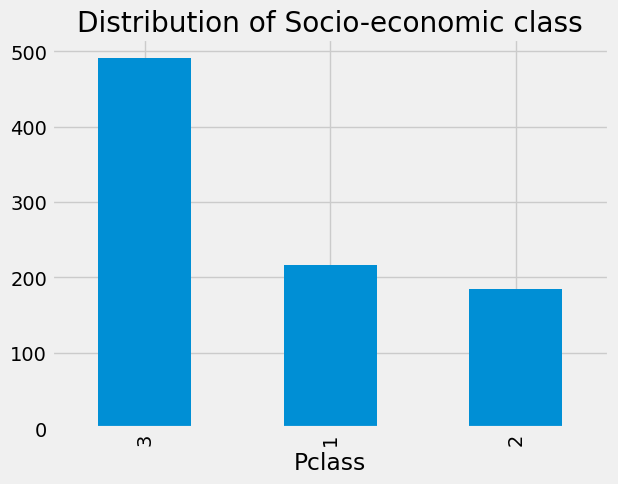

In [39]:
# the distribution of socio-economic class in the dataset
titanic_df['Pclass'].value_counts().plot(kind='bar', title='Distribution of Socio-economic class')

<Axes: title={'center': 'Distribution of Passenger Survived'}, xlabel='Survived'>

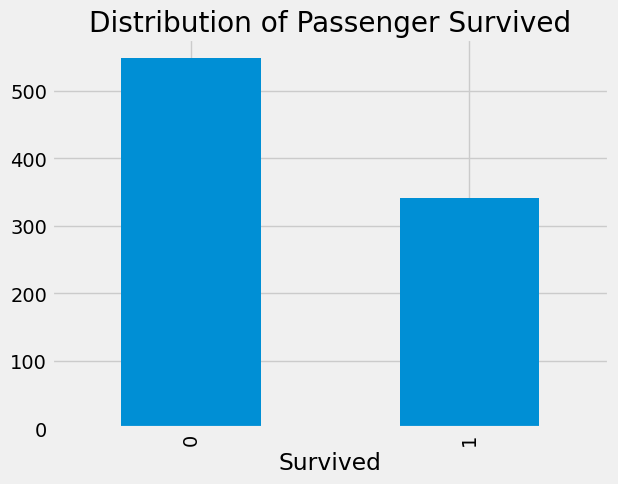

In [40]:
# the distribution of survived and non-survived people in the dataset
titanic_df['Survived'].value_counts().plot(kind='bar', title='Distribution of Passenger Survived')

## 2.4 Data Collection Method
Since the social class, survival rate distribution of the collected data are similar to the expected distribution in the population, the sampling method may be Stratefied sampling.

Using stratefied sampling can obtain a better representation of the demographic of the population than other sampling methods.

In [41]:
!pip install nbconvert

In [42]:
!jupyter nbconvert --to html notebooks/ProjectStage1.ipynb

[NbConvertApp] Converting notebook notebooks/ProjectStage1.ipynb to html
[NbConvertApp] Writing 738070 bytes to notebooks/ProjectStage1.html
